# Graphs and Graph Algorithms
For algorithms dealing with graphs it is helpful to use a library that provides the necessary data structures and a few "easy" algorithms so that we do not have to do everything from scratch. We will briefly introduce the graph library `NetworkX` which provides a means to represent graphs (directed or undirected) and their related properties (like edge or node weights). In addition, it contains a multitude of graph algorithms that we can use directly instead of doing the implementation ourselves. We will mainly use that library to represent our data and to use the graph algorithms.

The documentation for NetworkX is available at https://networkx.github.io/documentation/stable/index.html.

Here are a few important commands to get you started:
* To import the library and also a plotting library (for drawing the graphs), use the following commands:

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

* Empty (di-)graphs are created through the commands

In [14]:
G = nx.Graph()
G = nx.DiGraph()

* Adding nodes and edges (with properties) can be done like this:

In [15]:
G.add_node("important node")  # any hashable can be a node
G.add_nodes_from([1,2,3]) # add several nodes at once
G.add_edge(1, 2)  # default edge data=1
G.add_edge(2, 3, weight=0.9)  # specify edge property 'weight'
G.add_edges_from([(1,3), (2,1)]) # add several edges at once

* Visualizing a graph is possible through the `draw` function. For more complex visualizations (e.g. different color for certain edges), first determine the nodes positions, then draw nodes and edges separately.

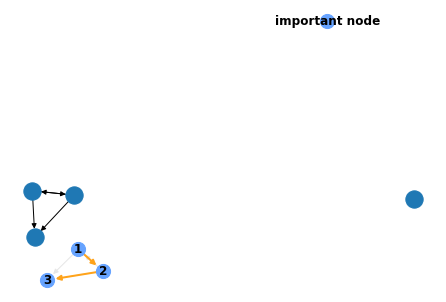

In [16]:
nx.draw(G) # draw the graph G
pos = nx.drawing.layout.spring_layout(G) # auto-layout for the node positions using a "spring layout"
nx.draw_networkx_nodes(G, pos, node_color='#66a3ff', node_size=200) # draw nodes only
nx.draw_networkx_labels(G, pos, font_weight='bold' ) # add labels to the nodes
nx.draw_networkx_edges(G, pos,  edge_color='#e6e6e6') # draw all edges
nx.draw_networkx_edges(G, pos,  edgelist=[(1,2), (2,3)], edge_color='#ffa31a', width=2) # draw selected edges

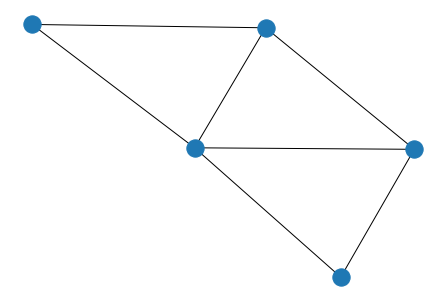

In [18]:
G = nx.Graph()
G.add_nodes_from(range(5))
G.add_edges_from([(0,1), (0,4), (1,2), (1,3), (1,4), (2,3), (3,4)])
nx.draw(G)

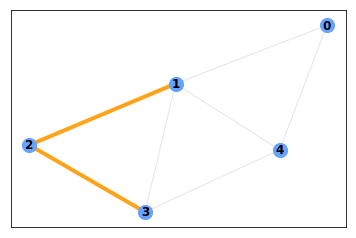

In [19]:
pos = nx.drawing.layout.spring_layout(G) # auto-layout for the node positions using a "spring layout"
nx.draw_networkx_nodes(G, pos, node_color='#66a3ff', node_size=200) # draw nodes only
nx.draw_networkx_labels(G, pos, font_weight='bold' ) # add labels to the nodes
nx.draw_networkx_edges(G, pos,  edge_color='#e6e6e6') # draw all edges
nx.draw_networkx_edges(G, pos,  edgelist=[(1,2), (2,3)], edge_color='#ffa31a', width=4) # draw selected edges

## Access to nodes and edges
is available through the properties `nodes`, `edges` and the funtions `number_of_nodes()`, `number_of_edges()` and `neighbors`:

In [20]:
G.number_of_nodes()

5

In [21]:
G.number_of_edges()

7

In [22]:
G.edges

EdgeView([(0, 1), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)])

In [23]:
G.nodes

NodeView((0, 1, 2, 3, 4))

In [24]:
for u in G.neighbors(1):
    print(f"Edge 1-{u}")

Edge 1-0
Edge 1-2
Edge 1-3
Edge 1-4


## Algorithms
available include 
* `maximal_matching(G)`
* `minimum_spanning_tree(G)`
* `eulerian_circuit(G)`

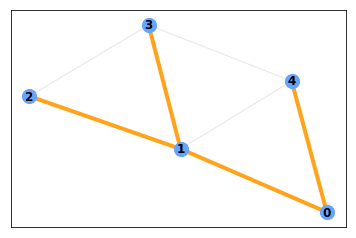

In [25]:
T = nx.minimum_spanning_tree(G)
pos = nx.drawing.layout.spring_layout(G) # auto-layout for the node positions using a "spring layout"
nx.draw_networkx_nodes(G, pos, node_color='#66a3ff', node_size=200) # draw nodes only
nx.draw_networkx_labels(G, pos, font_weight='bold' ) # add labels to the nodes
nx.draw_networkx_edges(G, pos,  edge_color='#e6e6e6') # draw all edges
nx.draw_networkx_edges(G, pos,  edgelist=T.edges, edge_color='#ffa31a', width=4) # draw selected edges

# TSPLib
For easy access to some examples, we use the library tsplib95 that load TSPLib instances via `load_problem`. The graph (in NetworkX format) is then available through the `get_graph()` function.

In [27]:
from tsplib95 import tsplib95

In [30]:
instance = tsplib95.load_problem('./tsplib/ulysses7.tsp')

In [ ]:
G = instance.get_graph()
nx.draw(G)

A TSPLib instance may contain coordinates for the nodes (e.g., if it is based on real geographical instances). These coordinates may be used as positions for graph drawing like this:
```
if instance.is_depictable():
    pos = {i: instance.get_display(i) for i in instance.get_nodes()}
else:
    pos = nx.drawing.layout.spring_layout(G)
```

This repository contains a small selection of TSP instances that you can use to test your algorithms.

| name | nodes | description |
|------|-------|-------------|
| ulysses16.tsp | 16 | Odyssey of Ulysses |
| ulysses7.tsp | 7 | subset of ulysses16 for testing purposes |
| bayg29.tsp | 29 | 29 Cities in Bavaria |
| bier127.tsp | 127 | 127 Biergaerten in Augsburg |
| bier20.tsp | 20 | subset of bier127 |
| brazil58.tsp | 58 | 58 cities in Brazil |
| ali535.tsp | 535 | 535 Airports around the globe |
| d18512.tsp | 18512 | 18512 places in Germany |

## Problem: Christofides' Algorithm
The following code uses networkx to compute and visualize a minimum spanning tree. 

1. Implement the approximation algorithm by Christofides based on this example.
1. Visualize your tour.
1. Test your algorithm for different instances of the TSPLib.

In [76]:
T = nx.minimum_spanning_tree(G)

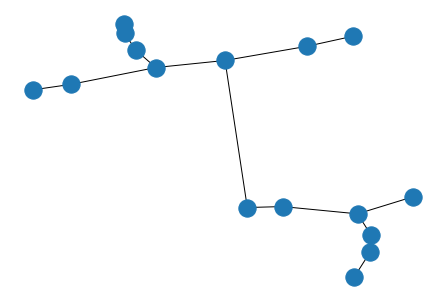

In [83]:
nx.draw(T)

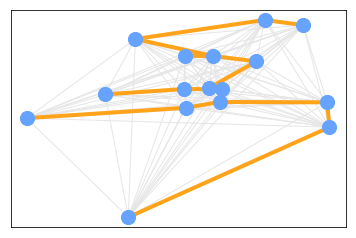

In [84]:
if instance.is_depictable():
    pos = {i: instance.get_display(i) for i in instance.get_nodes()}
else:
    pos = nx.drawing.layout.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='#66a3ff', node_size=200)
#nx.draw_networkx_labels(G, pos, font_weight='bold' )
nx.draw_networkx_edges(G, pos,  edge_color='#e6e6e6')
nx.draw_networkx_edges(G, pos,  edgelist=T.edges(), edge_color='#ffa31a', width=4)
